In developing the metric to identify the "best" neighborhoods in Pittsburgh, we decided to focus on population, average income, and the size of the neighborhood in acres. These variables were chosen for their relationship to the livability and appeal of a neighborhood. These factors were considered to determine the best neighborhood, balancing population density, economic prosperity, and the size of the area.
Along the way, other metrics were considered: a quality of life index including crime rates, school performance, and amenities; housing affordability; and walkability. All these alternatives were more difficult to quantify and required additional data; thus, they are not feasible for this analysis the metric chosen provides a clear and practical way to assess neighborhoods based on measurable attributes.

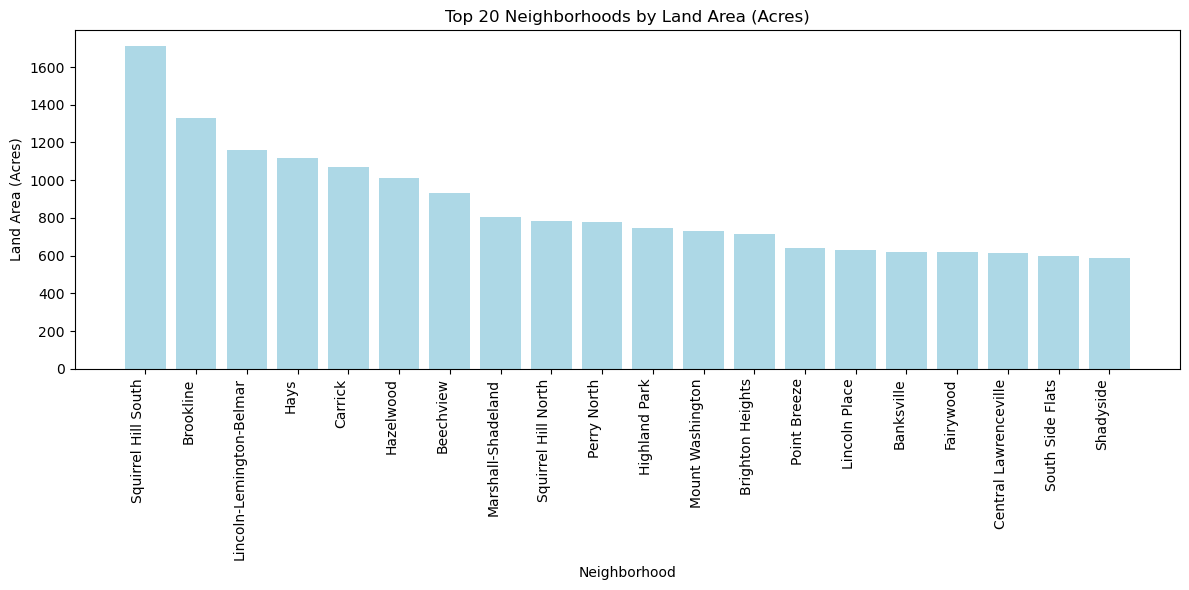

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "PGH_Neighborhoods_SNAP_OD_4374851025579228328.csv"
df = pd.read_csv(file_path)

df_clean = df.dropna(subset=['Land Area (acres)'])
neighborhood_acres = df_clean.groupby('HOOD')['Land Area (acres)'].sum().reset_index()
neighborhood_acres = neighborhood_acres.sort_values(by='Land Area (acres)', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(neighborhood_acres['HOOD'], neighborhood_acres['Land Area (acres)'], color='lightblue')
plt.xlabel('Neighborhood')
plt.ylabel('Land Area (Acres)')
plt.title('Top 20 Neighborhoods by Land Area (Acres)')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


Acres of Neighborhoods: The size of a neighborhood is a key factor in livability. Larger neighborhoods often offer more green space, recreational opportunities, and a variety of housing types. They also reduce congestion, allowing for more spacious streets and larger properties. Neighborhoods with more space allow for a greater population which increases diversity and makes larger communities. Population and the size of a neighborhood have a large correlation because the larger a community is the more it can prosper, but it also needs enough space so it is not overpopulated. I used a dataset of the total acres of neighborhoods in Pittsburgh. The neighborhood with the most acres would be considered the best for this category.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Columns: 190 entries, OBJECTID to Work at Home (2010)
dtypes: float64(24), int64(67), object(99)
memory usage: 133.7+ KB


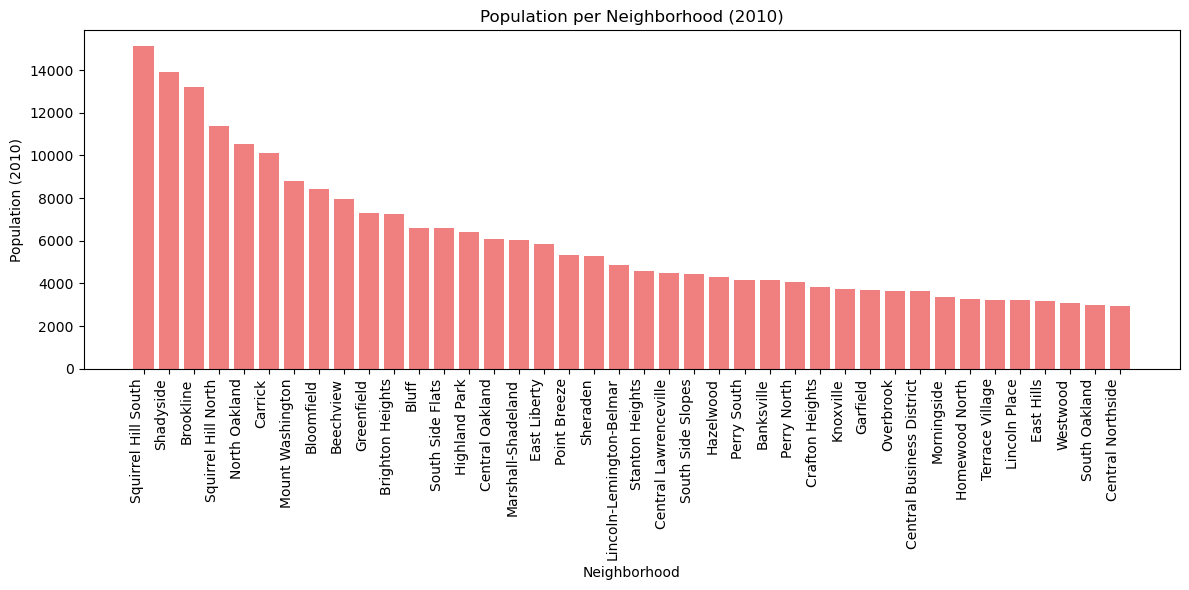

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "PGH_Neighborhoods_SNAP_OD_4374851025579228328.csv"

df = pd.read_csv(file_path)

df.head()

df.info()

df_clean = df.dropna(subset=['Pop. 2010'])

neighborhood_pop = df_clean.groupby('HOOD')['Pop. 2010'].sum().reset_index()

neighborhood_pop = neighborhood_pop.sort_values(by='Pop. 2010', ascending=False)


neighborhood_pop = neighborhood_pop.iloc[:-50]

plt.figure(figsize=(12, 6))
plt.bar(neighborhood_pop['HOOD'], neighborhood_pop['Pop. 2010'], color='lightcoral')
plt.xlabel('Neighborhood')
plt.ylabel('Population (2010)')
plt.title('Population per Neighborhood (2010)')

plt.xticks(rotation=90, ha='right', fontsize=10)

plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()


Population: The population density might reveal how crowded or, at least, alive the area feels. A high level of population may signal more life and a more community-oriented living with opportunities for social interactions, while at the same time, it can indicate congestion. I included the total population and density for a balanced view of the metric. I used a dataset that displays the total population per neighborhood allowing me to analyze that the highest population will allow us to recognize that it is the best in this category.

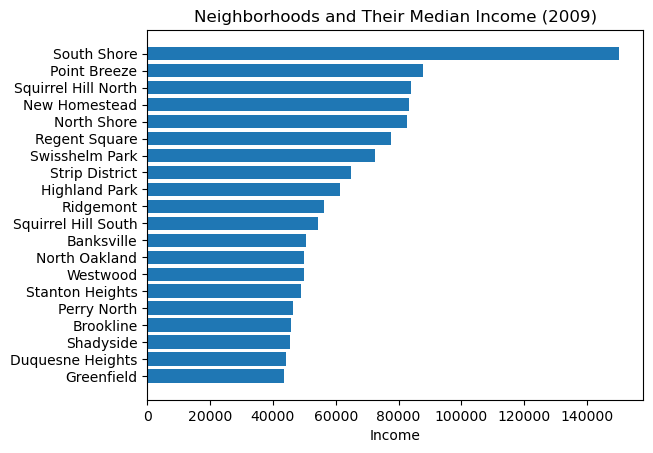

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("income.csv")
data = df.sort_values(by="2009 Median Income ('09 Dollars)", ascending=True)
data = data.iloc[70:] 
categories = data['Neighborhood']
income = data["2009 Median Income ('09 Dollars)"]

plt.barh(categories, income)
plt.xlabel('Income')
plt.ylabel('')
plt.title('Neighborhoods and Their Median Income (2009)')

plt.show()


-There is usually less crime in wealthier neighborhoods
-Better public service
-Easier to finance houses
-Houses in wealthier neighborhoods will gain more value over time


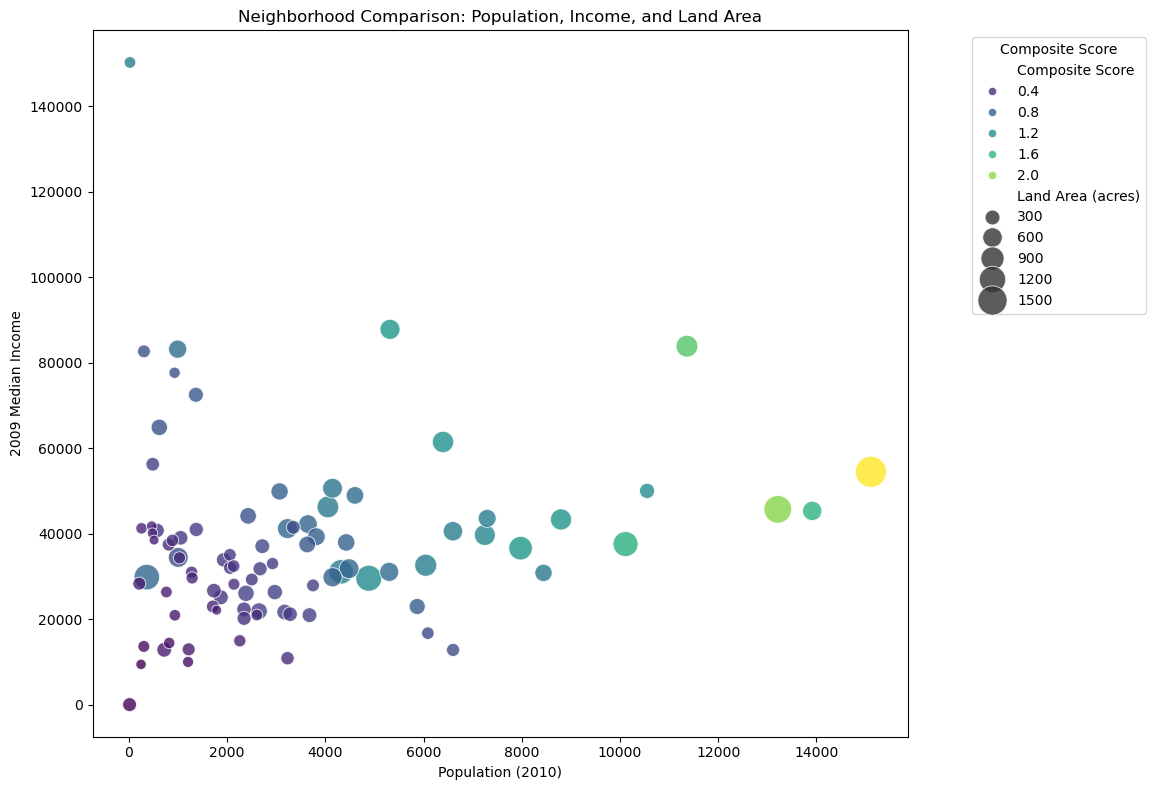

                   HOOD  Composite Score
76  Squirrel Hill South         2.362551
13            Brookline         1.958135
75  Squirrel Hill North         1.767693
67            Shadyside         1.567309
15              Carrick         1.545653
7             Beechview         1.317959
62         Point Breeze         1.312048
52     Mount Washington         1.297469
39        Highland Park         1.267661
55        North Oakland         1.217932


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "PGH_Neighborhoods_SNAP_OD_4374851025579228328.csv"
income_file_path = "income.csv"
df = pd.read_csv(file_path)
df_income = pd.read_csv(income_file_path)

df_clean = df.dropna(subset=['HOOD', 'Pop. 2010', 'Land Area (acres)'])
df_income_clean = df_income.dropna(subset=['Neighborhood', '2009 Median Income (\'09 Dollars)'])

neighborhood_data = df_clean.groupby('HOOD')[['Pop. 2010', 'Land Area (acres)']].sum().reset_index()
merged_data = pd.merge(neighborhood_data, df_income_clean, left_on='HOOD', right_on='Neighborhood', how='inner')

merged_data['Composite Score'] = (
    merged_data['Pop. 2010'] / merged_data['Pop. 2010'].max() + 
    merged_data['Land Area (acres)'] / merged_data['Land Area (acres)'].max() + 
    merged_data['2009 Median Income (\'09 Dollars)'] / merged_data['2009 Median Income (\'09 Dollars)'].max()
)

merged_data = merged_data.sort_values(by='Composite Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merged_data,
    x='Pop. 2010',
    y='2009 Median Income (\'09 Dollars)',
    size='Land Area (acres)',
    hue='Composite Score',
    palette='viridis',
    sizes=(50, 500),
    alpha=0.8
)
plt.title('Neighborhood Comparison: Population, Income, and Land Area')
plt.xlabel('Population (2010)')
plt.ylabel('2009 Median Income')
plt.legend(title='Composite Score', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

print(merged_data[['HOOD', 'Composite Score']].head(10))



FINAL VISUALIZATION

Squirrel Hill South has the best features in most of this dataset's three most important fields: population, average income, and neighborhood size. It ranks the highest overall due to the following reasons:
The High population in this neighborhood infers that this area of Squirrel Hill South represents vibrancy; therefore, it is truly lively as it has a very high population density. From this many social and cultural activities result, making living in Squirrel Hily ideal in terms of lifestyle and convenience for a resident of virtually any stripe.

Average Income: Relatively, income is higher on average in Squirrel Hill South compared to other neighborhoods. This is a sign of neighborhood economic health or prosperity, hence supporting improved amenities and conditions of living within the neighborhood. Higher average incomes translate into well-placed infrastructural development, good and healthy living conditions, and proper school facilities that enhance livability.

Square Footage/ Acres-neighborhood size: Squirrel Hill South is big and very green, including parks, open areas, and general wide spaces. Itsappea gets comfort in living; there is room for housing as well as other public features that balance it out. These translate into a less crowded feeling with more availability of open spaces to be used for outdoor events, activities, or merely for the appeal of it.

Since each one of these factors together, Squirrel Hill South would rank the highest since it's a neighborhood that provides an equal balance between the growth in the community, economic stability, and vast area to make the residents consider this area the best neighborhood in Pittsburgh.

While I only live about an hour and a half north, I have spent very little time around Pittsburgh in my lifetime. Because of this, the only neighborhood I can currently pick as my previous favorite is North Oakland because this is where I have spent most of my time in Pittsburgh. North Oakland has a sense of safety as it contains the campus of Pitt and I have found North Oakland to be a very likable place with easy access to many stores and events as they are all nearby and within walking distance.
 After our results, I realized that while Squirrel Hill South has qualities such as containing more area, having a higher average income, and a higher population, it is still impossible to say at a personal level that this neighborhood is for sure better. I say this because when I think of what makes a neighborhood the best for me at my age, it has very little to do with the wealth of the area and rather personal enjoyment. So, it makes sense that our results differ from my personal favorite as if I were to truly pick my favorite neighborhood in Pittsburgh, it would not be based on overall metrics alone.


The place where I grew up, Shadyside, has sentimental value for me. The memories built in Shadyside of walking the streets, spending time with friends, and experiencing the community's character are not quite captured by numbers alone. For me, Shadyside is more than just a place with high-income or spacious areas; it's a neighborhood that feels like home. The data may indicate that other neighborhoods could outrank in terms of size or income, but a sense of community and personal attachment to Shadyside can't be fully captured by a metric.

In contrast, the data-driven approach gives an external, analytical perspective, valuing quantifiable elements like economic stability and space. This approach might identify a different “best” neighborhood based on different criteria, but it lacks the personal touch that makes Shadyside so special to me.
